In [57]:
import time
import os
import os.path
import glob
import urllib.request
import cv2
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

In [58]:
haarfile = 'https://raw.githubusercontent.com/opencv/opencv/4.x/data/haarcascades/haarcascade_frontalface_alt2.xml'
haarfile = 'haarcascade_frontalface_alt2.xml'
photo = 'http://www.phoenixunionindoor.org/uploads/5/7/6/9/57696449/published/29541807-373703709706083-1742616959565939883-n-1.jpg?1534698039'

In [59]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + haarfile)

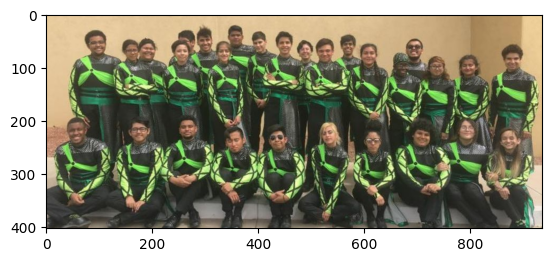

In [60]:
def process(img):
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Perform face detection
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4, minSize=(20, 20))

    crops = []
    
    # Draw rectangles around the detected faces
    for i,(x, y, w, h) in enumerate(faces):
        crop = img[y:y+h, x:x+w]
        crops.append(crop)
   
    return crops



# Read the input image and show it
if 'http' in photo:
    req = urllib.request.urlopen(photo)
    arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
    img = cv2.imdecode(arr, -1) # 'Load it as it is'
else:
    img = cv2.imread(filename)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

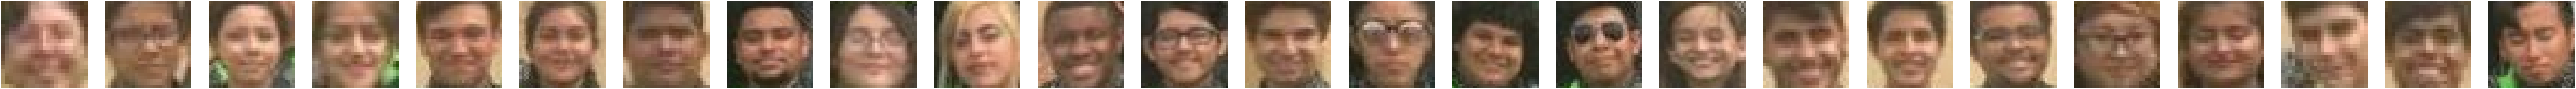

In [61]:
plt.rcParams.update({'figure.max_open_warning': 0})
crops = process(img)

if crops:
    plt.figure(figsize=(10 * len(crops), 10))
    for i,crop in enumerate(crops):
        plt.subplot(1, len(crops), i + 1)
        #img_rgb = cv2.cvtColor(crop, cv2.COLOR_BGR2RGB)
        plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))
        plt.axis('off')
plt.show()
#plt.close()
